In [2]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = load_iris()

In [4]:
X = data.data
y = data.target

In [5]:
print(f'shape X : {X.shape}')
print(f'shape y : {y.shape}')

shape X : (150, 4)
shape y : (150,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print(f'shape X_train : {X_train.shape}')
print(f'shape y_train : {y_train.shape}')
print(f'shape X_test : {X_test.shape}')
print(f'shape y_test : {y_test.shape}')

shape X_train : (120, 4)
shape y_train : (120,)
shape X_test : (30, 4)
shape y_test : (30,)


In [8]:
#One-hot encoding data lable
y_train =to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print(f'shape y_train : {y_train.shape}')
print(f'shape y_test : {y_test.shape}')

#Checking that be balanced data shape
assert y_train.shape == (120,3)
assert y_test.shape == (30,3)

shape y_train : (120, 3)
shape y_test : (30, 3)


In [10]:
model = Sequential([
    Dense(10, activation='relu', input_dim=4),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(3)
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=5
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.3704 - loss: 1.3674 
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.2209 - loss: 1.3323
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.2530 - loss: 1.2482   
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3553 - loss: 1.1616
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.3374 - loss: 1.1171
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.4322 - loss: 1.0192
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.4789 - loss: 0.9843
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5651 - loss: 0.9213
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6334 - loss: 0.8147
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6594 - loss: 0.7741
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.5816 - loss: 0.7226
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━

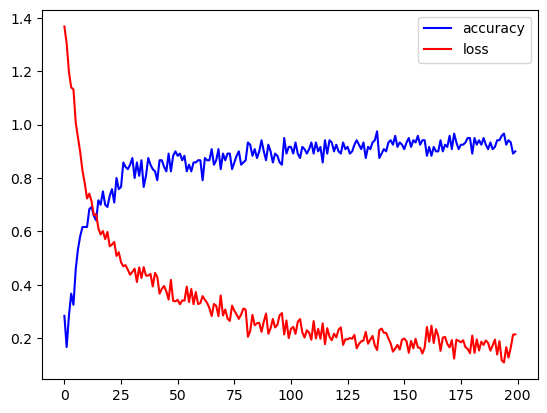

In [14]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['loss'], color='red')
plt.legend(['accuracy', 'loss'])

In [15]:
result = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9667 - loss: 0.1067


In [16]:
predicted = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [17]:
prediction = np.argmax(predicted, axis=1)
prediction

array([1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 0, 1, 1, 2, 0, 0])

In [18]:
y_test = np.argmax(y_test, axis=1)

In [19]:
y_test

array([1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 0])

In [20]:
y_test == prediction

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])